## Variables ecómicas

Unión de las variables economicas en la variable *df_var*

In [27]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.linear_model import LinearRegression 
from statsmodels.tsa.arima.specification import SARIMAXSpecification
from statsmodels.tsa.arima.params import SARIMAXParams

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
%store -r df_mex         #Invesion_ES.pynb
%store -r df_desempleo   #edit_Desempleo.pynb
%store -r df_IED         #edit_IED.pynb
%store -r df_IPC         #edit_IPC.pynb
%store -r df_reservas    #edit_reservas.pynb
%store -r df_deuda       #edit_deuda.pynb
%store -r df_interes
%store -r df_balanzapagos 
%store -r df_import
%store -r df_export
%store -r df_PIB_total

no stored variable #Invesion_ES.pynb
no stored variable #edit_Desempleo.pynb
no stored variable #edit_IED.pynb
no stored variable #edit_IPC.pynb
no stored variable #edit_reservas.pynb
no stored variable #edit_deuda.pynb


In [4]:
df_var = pd.concat([df_IPC,df_desempleo,df_mex,df_IED,df_reservas,df_deuda,df_interes, df_balanzapagos, df_import, df_export, df_PIB_total], axis=1)

In [5]:
df_var

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
1993,9.75,3.37,47.13597,0.00,22500.67,117269.60,18.23,-20811.96,60076.30,46147.41,500736.07
1994,6.97,4.44,17.01775,0.01,5170.50,112309.71,19.30,-23809.78,65810.16,48869.98,527813.24
1995,35.00,7.10,8.26311,0.01,12727.92,124500.30,59.43,-1177.13,55574.64,59394.01,360073.91
1996,34.38,5.47,13.62250,0.01,15467.27,124821.36,36.39,-1986.39,72856.57,76041.60,410975.60
1997,20.63,4.24,46.83067,0.01,26356.74,135969.78,22.14,-7001.92,103336.03,100878.72,500413.48
1998,15.93,3.73,35.71018,0.01,27166.55,136569.31,26.36,-13635.34,110046.79,100146.40,526502.13
1999,16.59,2.60,50.16676,0.01,31592.87,166731.61,23.74,-13896.14,145002.98,135381.71,600232.87
2000,9.49,2.65,69.98563,0.02,37751.05,161879.29,16.93,-19898.19,190429.25,176532.02,707906.74
2001,6.37,2.63,35.13027,0.03,50293.24,186407.40,12.80,-19927.19,194236.28,177969.01,756706.30
2002,5.03,3.00,30.76274,0.02,48259.49,149787.48,8.21,-14168.26,164848.06,153033.54,772106.38


Text(0.5, 1.0, 'Evolución variables economicas')

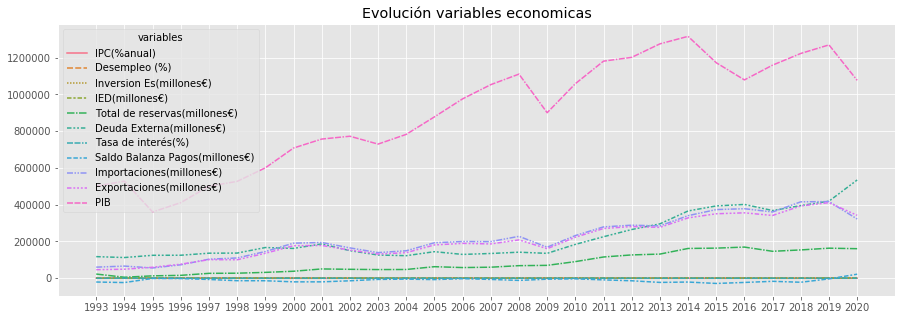

In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_var)
plt.title('Evolución variables economicas')

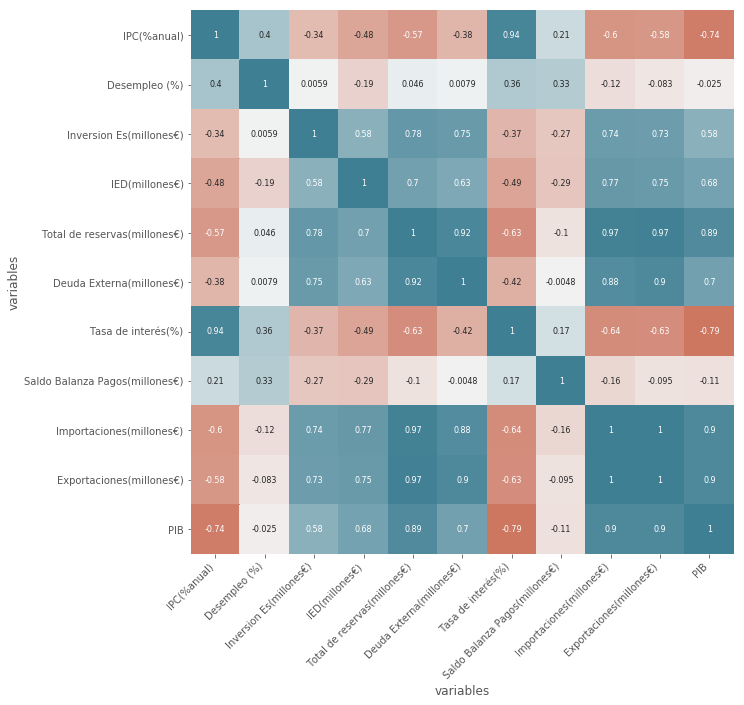

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(df_var.corr(), annot=True,
            cbar      = False,
            annot_kws = {"size": 8},
            vmin      = -1,
            vmax      = 1,
            center    = 0,
            cmap      = sns.diverging_palette(20, 220, n=200),
            square    = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

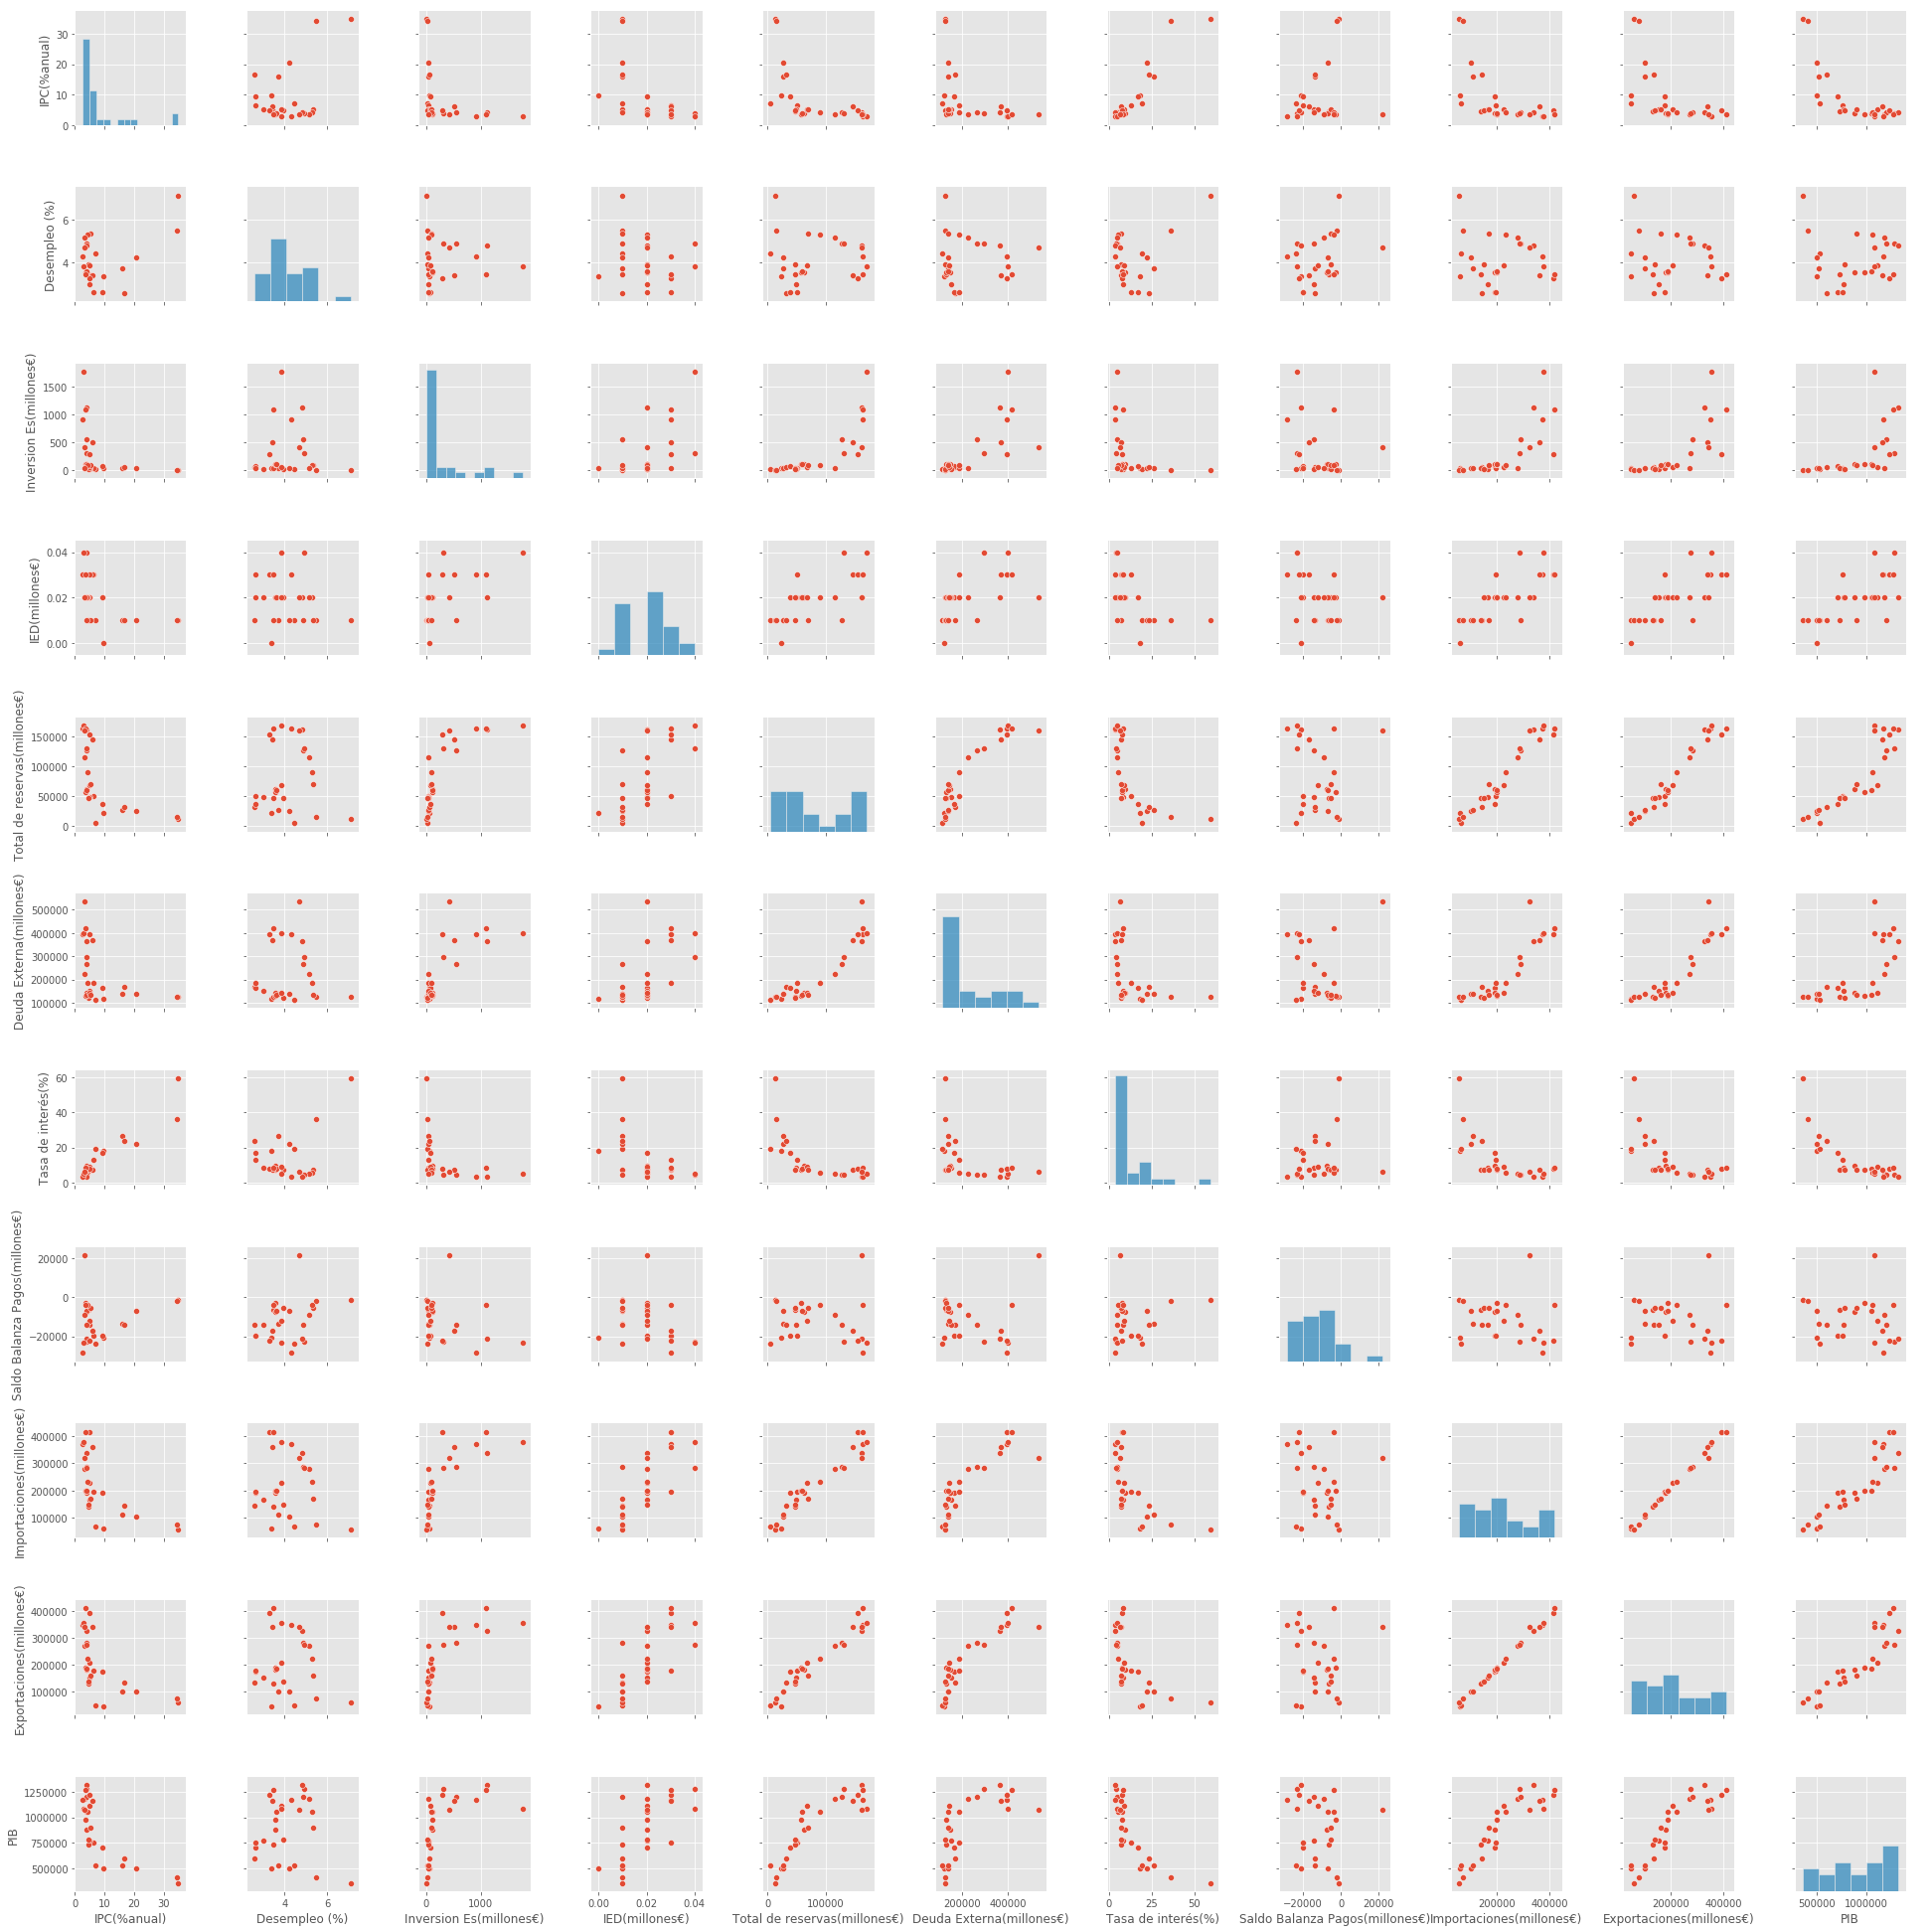

In [8]:
sns.pairplot(df_var)

In [9]:
df_var.corr()

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
variables,,,,,,,,,,,
IPC(%anual),1.000000,0.401250,-0.336542,-0.478474,-0.566706,-0.384814,0.941077,0.205295,-0.599239,-0.575412,-0.740281
Desempleo (%),0.401250,1.000000,0.005864,-0.190099,0.046436,0.007865,0.364423,0.331267,-0.120830,-0.083447,-0.024917
Inversion Es(millones€),-0.336542,0.005864,1.000000,0.575474,0.784724,0.752302,-0.372348,-0.265274,0.739896,0.734196,0.575083
IED(millones€),-0.478474,-0.190099,0.575474,1.000000,0.701697,0.630341,-0.492774,-0.285271,0.769075,0.753535,0.681160
Total de reservas(millones€),-0.566706,0.046436,0.784724,0.701697,1.000000,0.922504,-0.626974,-0.101389,0.966420,0.973093,0.891924
Deuda Externa(millones€),-0.384814,0.007865,0.752302,0.630341,0.922504,1.000000,-0.424241,-0.004770,0.881821,0.901814,0.695744
Tasa de interés(%),0.941077,0.364423,-0.372348,-0.492774,-0.626974,-0.424241,1.000000,0.170134,-0.644998,-0.626626,-0.786063
Saldo Balanza Pagos(millones€),0.205295,0.331267,-0.265274,-0.285271,-0.101389,-0.004770,0.170134,1.000000,-0.161574,-0.095463,-0.114942
Importaciones(millones€),-0.599239,-0.120830,0.739896,0.769075,0.966420,0.881821,-0.644998,-0.161574,1.000000,0.996883,0.904930


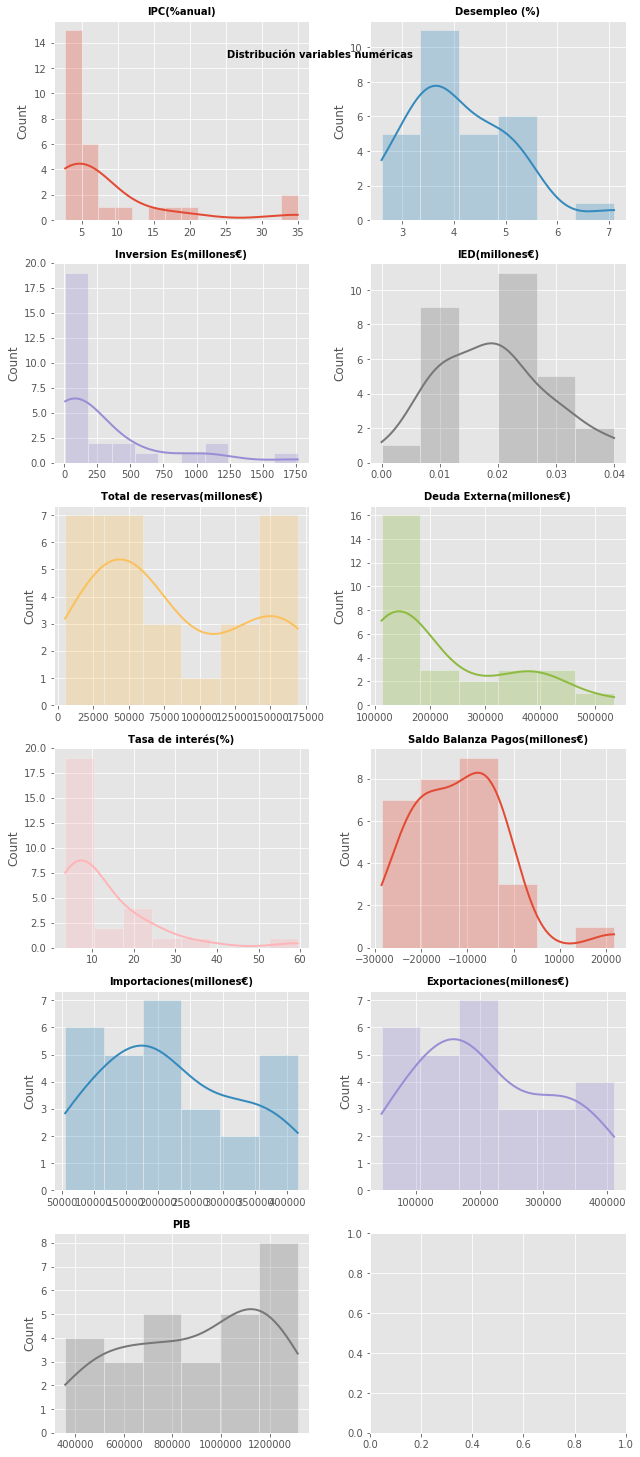

In [10]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(9, 20))
axes = axes.flat
columnas_numeric = df_var.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_var,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 1)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Regresión Lineal Múltiple

In [25]:
# División de los datos en train y test
X = df_var[['IPC(%anual)', 'Desempleo (%)', 'IED(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)', 'Tasa de interés(%)', 'Saldo Balanza Pagos(millones€)','Importaciones(millones€)', 'Exportaciones(millones€)','PIB'   ]]
y = df_var['Inversion Es(millones€)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [26]:
# Creación del modelo utilizando matrices como en scikitlearn
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     Inversion Es(millones€)   R-squared:                       0.951
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     19.45
Date:                     Thu, 03 Jun 2021   Prob (F-statistic):           2.99e-05
Time:                             18:54:03   Log-Likelihood:                -127.26
No. Observations:                       21   AIC:                             276.5
Df Residuals:                           10   BIC:                             288.0
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

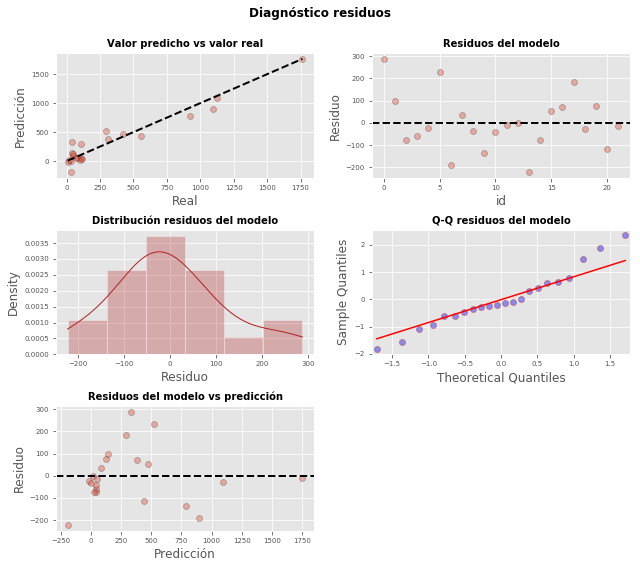

In [14]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [15]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.9650347232818604, 0.5971193313598633)

In [16]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1.764744997346964, p-value = 0.41380000620584645


In [17]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2011,332.256976,82.963820,149.654839,514.859112,-92.109426,756.623377
2003,140.636381,89.245814,-55.792331,337.065092,-289.860473,571.133234
2007,40.566735,100.387421,-180.384488,261.517959,-401.658033,482.791503
2006,45.463749,80.923625,-132.647949,223.575446,-376.989893,467.917390


# Sarimax

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()